In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats as st

## Нормальное распределение


Cмоделируем нормальное распределение роста мужчин с ско 10


In [4]:
# зададим точку отсчета
np.random.seed(10)

# задаем параметры распределения

mu = 180 # среднее значение
sigma = 10 # стандартное отклонение
n = 10000 # количество значений

# генерируем случайные значения роста
h_men = np.random.normal(mu, sigma, n)

(array([  15.,  139.,  583., 1626., 2733., 2679., 1606.,  497.,  107.,
          15.]),
 array([143.78361204, 151.09674016, 158.40986829, 165.72299642,
        173.03612454, 180.34925267, 187.6623808 , 194.97550892,
        202.28863705, 209.60176518, 216.9148933 ]),
 <BarContainer object of 10 artists>)

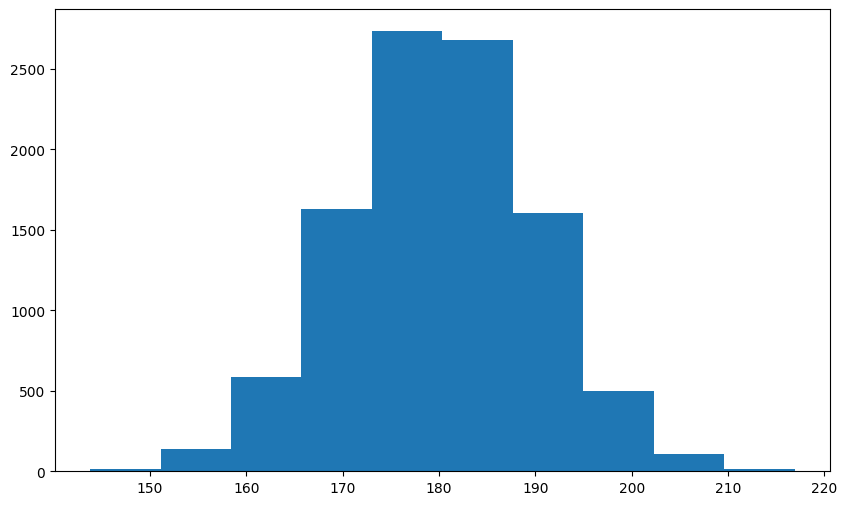

In [5]:
# выведем результат с помощью гистограммы
plt.figure(figsize=(10, 6))
plt.hist(h_men, bins=10)

In [6]:
# зададим точку отсчета
np.random.seed(10)

# задаем параметры распределения

mu = 180 # среднее значение
sigma = 10 # стандартное отклонение
n = 10000 # количество значений
sigma_2 = 5

# генерируем случайные значения роста
h_men = np.random.normal(mu, sigma, n)
h_men_2 = np.random.normal(mu, sigma_2, n)

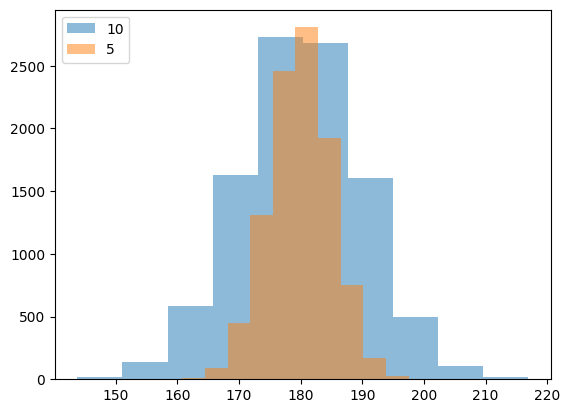

In [7]:
# выведем результат с помощью гистограммы
plt.hist(h_men, bins=10, alpha=0.5, label=sigma)
plt.hist(h_men_2, bins=10, alpha=0.5, label=sigma_2)
plt.legend(loc='upper left')

### Вывод

    При увеличении сигмы график распределения становится более сплюснутым. Есди мы будем изменять среднее значение, то график будет передвигаться вправо/влево в зависимости от того увеличиваем или уменьшаем среднее значение.

Смоделирую оптимальное верхнее(100-120) и нижнее артериальное (60-80) давление человека

In [8]:
upper_blood_pressure = np.random.normal(110, 10, 10000)
lower_blood_pressure = np.random.normal(70, 10, 10000)

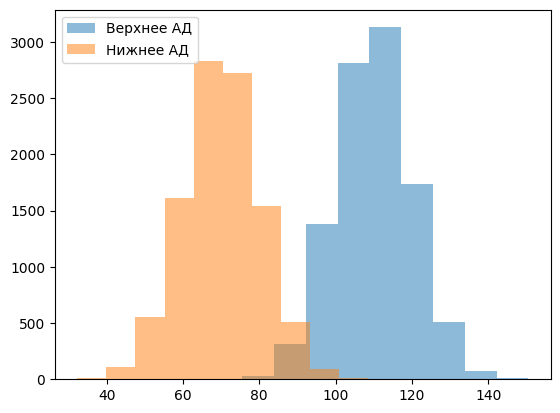

In [9]:
# Визуализирую на одном рисунке
plt.hist(upper_blood_pressure, alpha=0.5, label='Верхнее АД')
plt.hist(lower_blood_pressure, alpha=0.5, label='Нижнее АД')
plt.legend(loc='upper left')

<Axes: ylabel='Density'>

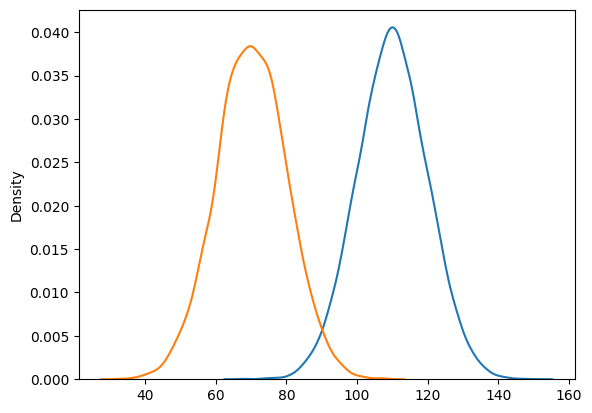

In [10]:
# плотность распределения с помощью sns.kdeplot
sns.kdeplot(upper_blood_pressure)
sns.kdeplot(lower_blood_pressure )

Плотность распределения это функция, которая описывает вероятность того, что случайная величина примет определенное значение. В то же время, она не дает напрямую вероятность конкретного значения случайной величины, а лишь показывает, как вероятность распределена над всем возможным диапазоном значений.


In [11]:
# создадим датафрейм из словаря из полученных данных
data = pd.DataFrame({'Верхнее АД': upper_blood_pressure, 'Нижнее Ад': lower_blood_pressure})
data

,Верхнее АД,Нижнее Ад
0,113.330822,63.382189
1,104.831251,71.384912
2,108.270139,87.280077
3,108.746694,81.538915
4,113.466128,63.475406
...,...,...
9995,112.038761,75.331437
9996,110.678295,63.978399
9997,117.396391,77.304683
9998,113.828556,66.581023


Проверим описательные статистики

In [12]:
data.describe()

,Верхнее АД,Нижнее Ад
count,10000.000000,10000.000000
mean,109.977359,70.147394
std,9.963250,10.024641
min,67.183727,32.323836
25%,103.257516,63.382113
50%,109.985690,70.100817
75%,116.633251,76.901093
max,150.529787,108.475283


Text(0.5, 1.0, 'Распределение АД')

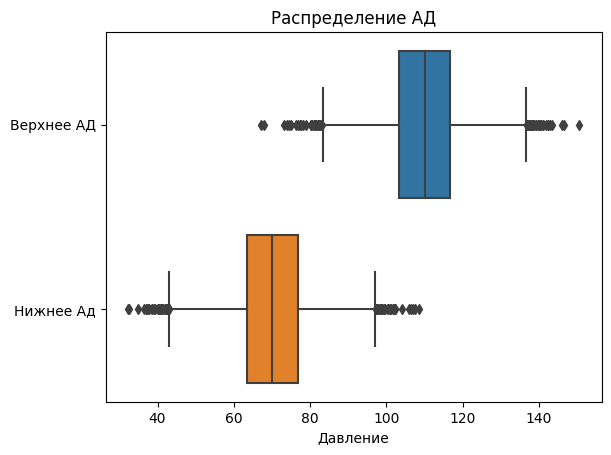

In [13]:
#построим два горизонтальных boxplots с помощью sns.boxplot(), передав датафрейм с данными в параметр data
sns.boxplot(data=data, orient='h')

# подпись и заголовок
plt.xlabel('Давление')
plt.title('Распределение АД')

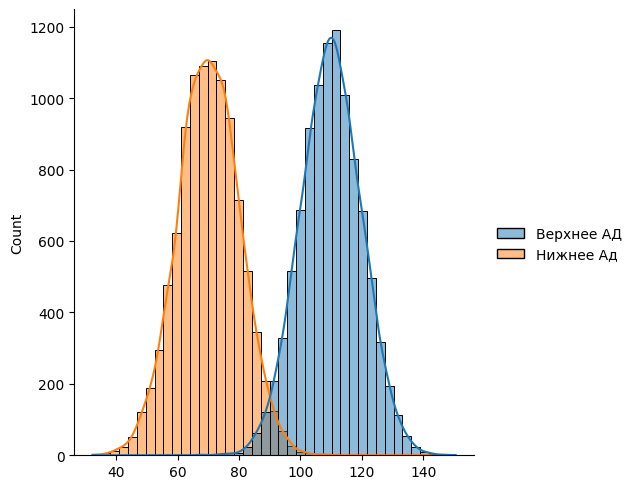

In [14]:
sns.displot(data=data, kde=True)

![](https://en.wikipedia.org/wiki/Box_plot#/media/File:Boxplot_vs_PDF.svg)

Решим теперь задачу генерации нормального распределения с помощью библиотеки Scipy.

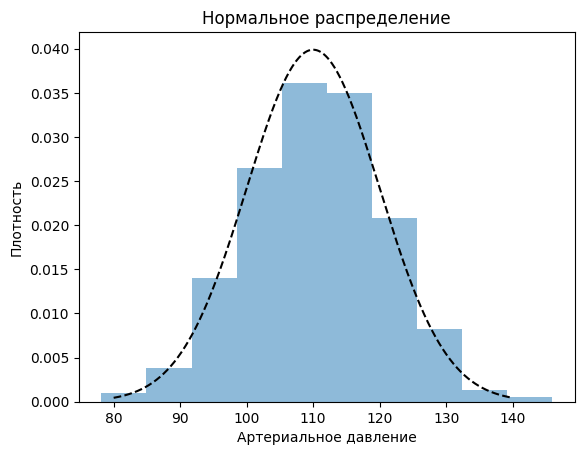

In [15]:
# Задаем параметры нормального распределения
mu = 110
sigma = 10

# Генерируем значения случайной величины на основе нормального распределения
h_pressure = norm.rvs(loc=mu, scale=sigma, size=1000)

# Создаем значения для оси x, на которой будем строить график от +- 3 sigma
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)

# Вычисляем значения функции плотности вероятности на оси x
f_norm = norm.pdf(x, loc=mu, scale=sigma)

# Строим гистограмму на основе сгенерированных значений случайной величины
plt.hist(h_pressure, density=True,  alpha=0.5)

# Строим график функции плотности вероятности
plt.plot(x, f_norm, color='k', linestyle='--')

# Настраиваем внешний вид графика
plt.xlabel('Артериальное давление')
plt.ylabel('Плотность')
plt.title('Нормальное распределение')

# Показываем график
plt.show()

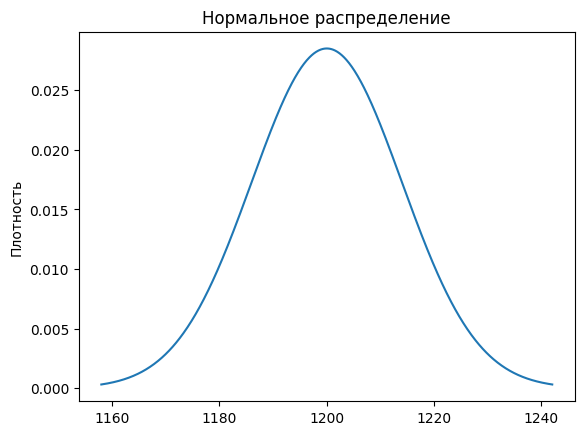

In [16]:
# Построим график плотности вероятности, если случайная величина распределена нормально со средним значением 1200 и стандартным отклонением 14
# Задаем параметры нормального распределения

mu = 1200  # среднее значение
sigma = 14  # стандартное отклонение

# Создаем массив значений и вычисляем плотность вероятности для каждого значения нормального распределения
h_pressure = norm.rvs(loc=mu, scale=sigma, size=1000)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
f_norm = norm.pdf(x, loc=mu, scale=sigma)

# Строим график плотности вероятности
plt.plot(x, f_norm)

# Показываем график
plt.ylabel('Плотность')
plt.title('Нормальное распределение')
plt.show()

Можно сделать быстрее

In [17]:
mu = 1200
sigma = 4
distr = norm.rvs(mu, sigma, size=1000)
distr

array([1197.08137887, 1201.22263847, 1202.41515898, 1200.37919886,
       1203.26023862, 1195.11715837, 1200.66042893, 1202.59445221,
       1191.99126914, 1197.9781812 , 1194.03555219, 1201.64332087,
       1203.74027489, 1195.93877752, 1199.79722744, 1200.36330771,
       1208.56404599, 1210.99760349, 1198.83671383, 1206.78961453,
       1202.50026938, 1203.53810551, 1197.58803905, 1193.43106053,
       1198.92950135, 1200.82836567, 1195.23724145, 1201.5594724 ,
       1199.84862829, 1199.33803001, 1196.30252279, 1202.41735522,
       1200.90512303, 1199.89884106, 1198.87581997, 1205.35069712,
       1201.63871302, 1197.73624634, 1196.8351736 , 1201.49508711,
       1202.4229425 , 1201.20609695, 1197.4375973 , 1201.14482274,
       1197.00586096, 1193.82723198, 1204.44178859, 1204.79717324,
       1205.62405831, 1205.35568536, 1203.06871268, 1197.55027319,
       1196.56432985, 1199.63994567, 1192.68978114, 1195.32893954,
       1202.15318053, 1190.96258378, 1205.2519673 , 1197.75003

<Axes: ylabel='Density'>

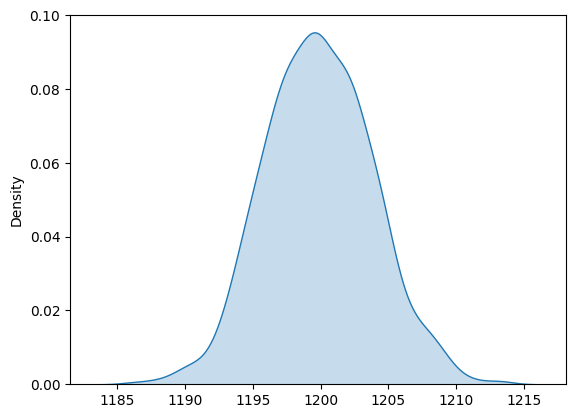

In [18]:
sns.kdeplot(distr, fill=True)

Решим задачу нахожения вероятности получить значение 110, найдем вероятность  получить значение больше и меньше 120.

In [19]:
# среднее значение
mu = 110
# стандартное отклонение
# создаем нормальное распределение
sigma = 10
distr = norm(mu, sigma)
# значение, для которого хотим найти вероятность
find = 120  # экспериментируем со значениями
presult_left = distr.cdf(find)
presult_right = 1 - presult_left

# находим вероятность получить значение, меньше или больше чем find_ad


print(f"вероятность получить значение меньше 120: {np.round(presult_left, 2)}, больше 120: {np.round(presult_right, 2)}")


вероятность получить значение меньше 120: 0.84, больше 120: 0.16


Найдем вероятность попадания в АД в диапазон 120-130

0.13590512198327787


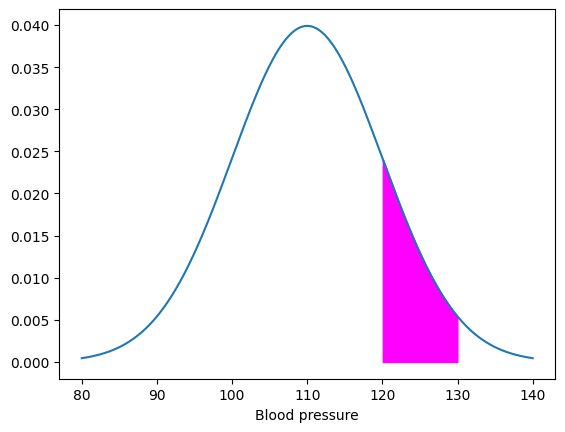

In [20]:
find_r, find_l = 130, 120
res = distr.cdf(find_r) - distr.cdf(find_l)
print(res)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.fill_between(x, y, where=(x > 120) & (x < 130), color='magenta')
plt.xlabel('Blood pressure')
plt.show()

Пусть средний чек распределен нормально с средним значением 1000 и ско 100. Найдем вероятность получить средний чек больше 1110

Вероятность получить средний чек больше 1110: 0.14


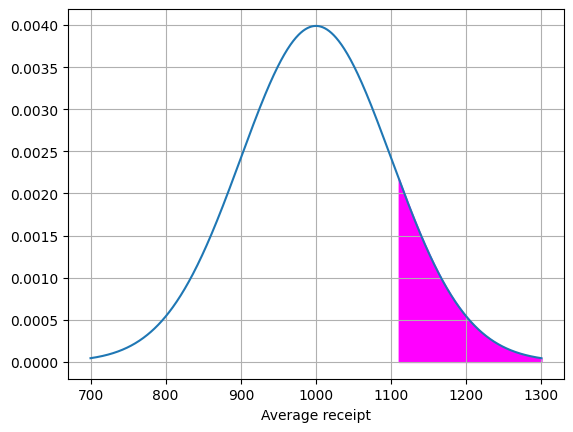

In [21]:
mu, std = 1000, 100 # среднее значение и СКО
receipt = 1110

distr = norm(1000, 100)
p_receipt = 1 - distr.cdf(receipt)
print(f"Вероятность получить средний чек больше 1110: {round(p_receipt, 2)}")
# создаем значения для оси x, на которой будем строить график от +- 3 sigma
x = np.linspace(mu - 3 * std, mu + 3 * std, 1000)

# вычисляем значения функции плотности вероятности на оси x
y = norm.pdf(x, loc=mu, scale=std)

plt.plot(x, y)
plt.fill_between(x, y, where=(x>1110), color='magenta')
plt.xlabel('Average receipt')
plt.grid()
plt.show()


Решим обратную задачу: найти значение АД не больше которого мы получим с веротяностью 0.1

In [22]:
# среднее значение
mu = 110

# стандартное отклонение
sigma = 10

# создаем нормальное распределение
distr = norm(mu, sigma)

# значение, для которого хотим найти вероятность
p =  0.1 # экспериментируем со значениями

# находим значение АД, не больше которорго мы получим с вероятностью 0.1
result_left = distr.ppf(p)
result_right = 1 - result_left

print(f"С вероятность 0.1 мы получим значеиние не более {result_left}")

С вероятность 0.1 мы получим значеиние не более 97.184484344554


## Стандартное нормальное распределение

Осуществим стандартизацию, ранее найденных upper_blood_pressure и lower_blood_pressure

In [ ]:
upper_blood_pressure_std = (upper_blood_pressure - np.mean(upper_blood_pressure)) / np.std(upper_blood_pressure)

In [ ]:
lower_blood_pressure_std = (lower_blood_pressure - np.mean(lower_blood_pressure)) / np.std(lower_blood_pressure)

<AxesSubplot:ylabel='Density'>

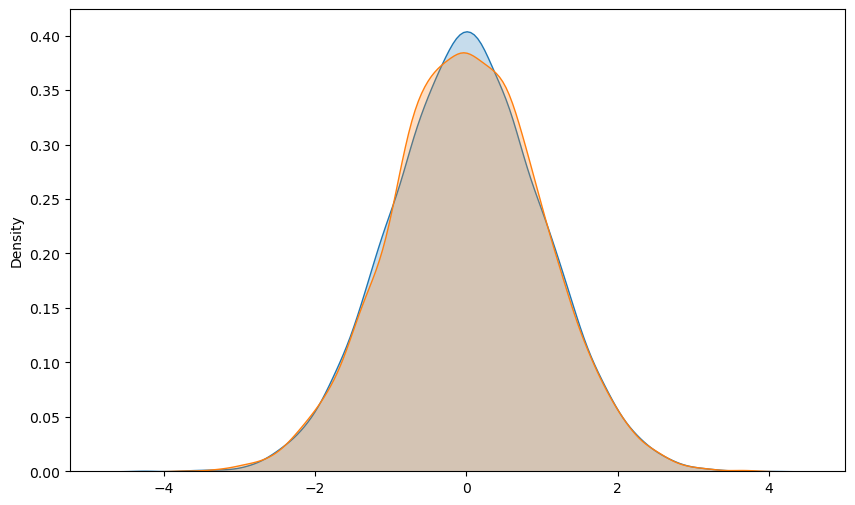

In [ ]:
plt.figure(figsize=(10, 6))


sns.kdeplot(upper_blood_pressure_std, fill=True, label='Upper BP')
sns.kdeplot(lower_blood_pressure_std, fill=True, label='Lower BP')